#### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?  
It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].dropna().sample()

# what sample does is it will print any index form the datasert with the age,means a sample from the dataset

342    28.0
Name: Age, dtype: float64

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

# df['Age'].dropna().sample(df['Age'].isnull().sum())
#  isnull().sum() is 177,so we are printing 177 values with age

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
df.loc[95, 'Age']


nan

In [8]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [9]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
# df[variable+"_median"]=df[variable].fillna(median) - just created one col and fill all nan with its median
# df[variable+"_random"]=df[variable] - created one col for random value storing for nan

# random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
# stored value from random samples

# random_sample.index=df[df[variable].isnull()].index
# it is storign the values got in random_sample to the nan index

# df.loc[df[variable].isnull(),variable+'_random']=random_sample
# it is restorign the value in random col

In [11]:
median=df.Age.median()
median

28.0

In [12]:
impute_nan(df,"Age",median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

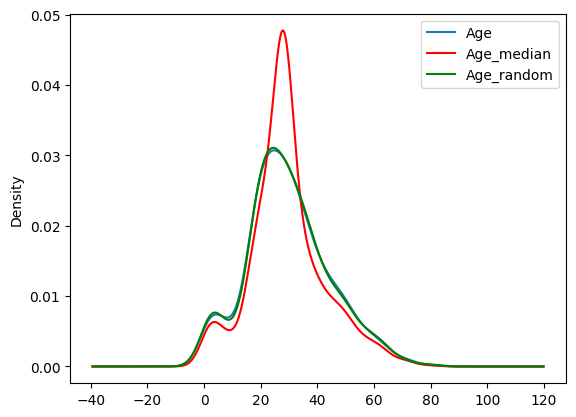

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



# this plot shows us that instead of median we can do random sample imputaion ,it will give accurate data

##### Advantages
1. Easy To implement
2. There is less distortion in variance(# this plot shows us that instead of median we can do random sample imputaion ,it will give accurate data)

##### Disadvantage
1. Every situation randomness wont work

### 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random   
means there is some relastion between the data missing and any other values, observed or missing, within the dataset.

In [15]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [17]:
df.Age.median()

28.0

In [18]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)


# now nan is replaced with the median,so now machine will think that teh col having 1 in Age_NAN is having some relastion with the (median)
# value in the Age col

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Here there is relationshipm between Age and the Age_NAN so the machin can learn something from both teh features

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)  
it says that if there are many features and we apply this on all features then it will incres teh dim the col

#### End of Distribution imputation

In [40]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


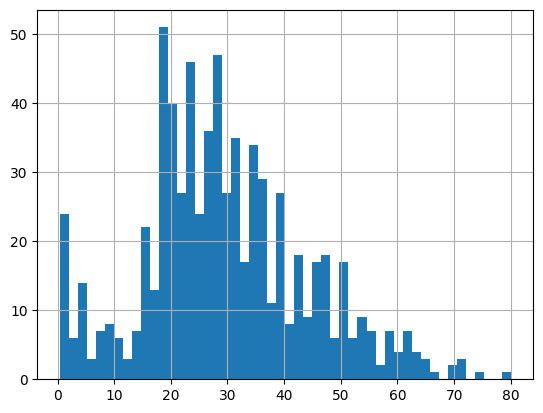

In [42]:
df.Age.hist(bins=50)
plt.show()

In [43]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [44]:
df.Age.isnull().sum()

177

<Axes: xlabel='Age'>

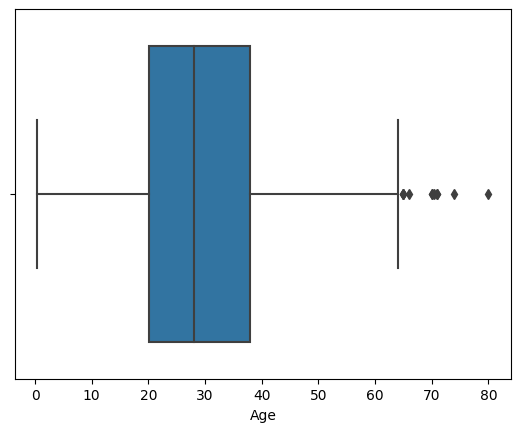

In [45]:
import seaborn as sns
sns.boxplot(x='Age',data=df)


In [46]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [47]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head()


,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

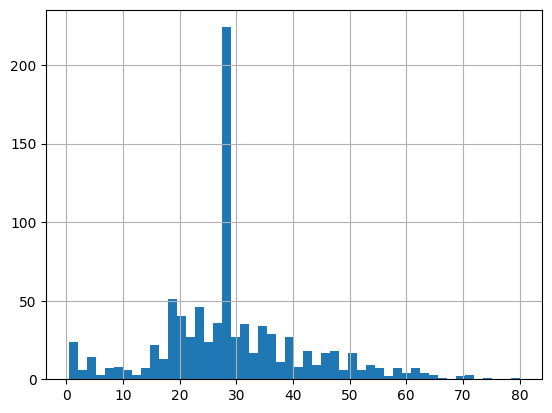

In [48]:
df['Age'].hist(bins=50)

<Axes: >

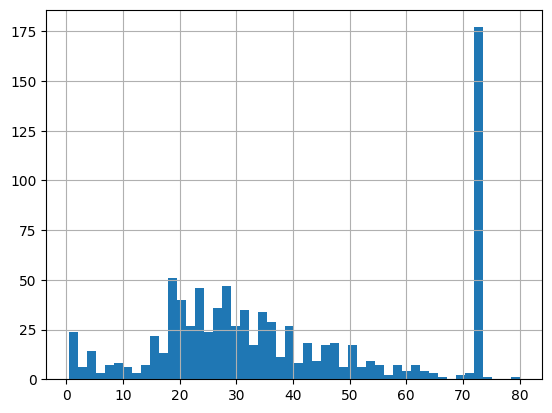

In [49]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

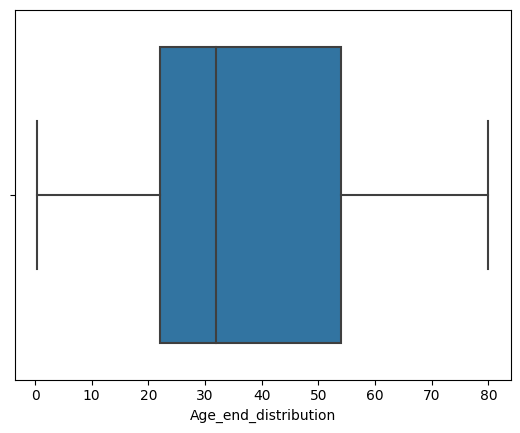

In [50]:
sns.boxplot(x='Age_end_distribution',data=df)